# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [3]:
!pip install seaborn

     |████████████████████████████████| 292 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 2.4 MB/s eta 0:00:01    |█▎                              | 1.1 MB 3.5 MB/s eta 0:00:08     |█████▉                          | 5.1 MB 2.6 MB/s eta 0:00:09     |███████▎                        | 6.4 MB 2.8 MB/s eta 0:00:08     |███████████████████             | 16.9 MB 3.0 MB/s eta 0:00:04     |██████████████████████▋         | 20.0 MB 4.7 MB/s eta 0:00:02     |██████████████████████████████  | 26.6 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 2.0 MB/s eta 0:00:01    |█████████                       | 2.9 MB 2.4 MB/s eta 0:00:04     |██████████▊                     | 3.4 MB 2.7 MB/s eta 0:00:03
     |████████████████████████████████| 1.2 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 572 kB/s eta 0:00:01


In [4]:
!pip install matplotlib

In [8]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [10]:
# your code here
fitbit = pd.read_csv("../data/Fitbit2.csv")

In [11]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [29]:
fitbit.shape

(367, 24)

In [28]:
fitbit.sample(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
272,2016-02-04,2037,2449,1.87,0,821.0,80,0,0,3370,...,1.161964,Thursday,3.0,1,6.833333,94.036697,4.133333,88.571429,February,2
228,2015-12-22,2636,7378,5.48,12,838.0,176,33,12,1044,...,3.405113,Tuesday,1.0,1,2.683333,94.705882,1.700000,96.226415,December,12
241,2016-01-04,3116,10366,7.70,16,650.0,235,53,30,159,...,4.784557,Monday,0.0,1,7.466667,88.537549,4.033333,96.031746,January,1


In [45]:
fitbit2=pd.DataFrame(fitbit["Steps"].groupby(fitbit["Months_encoded"]).mean()).reset_index()
fitbit3=pd.DataFrame(fitbit["Steps"].groupby(fitbit["Months_encoded"]).median()).reset_index()
fitbit2

,Months_encoded,Steps
0,1,9892.064516
1,2,8922.866667
2,3,10312.935484
3,4,13079.033333
4,5,10620.096774
5,6,12536.166667
6,7,9193.322581
7,8,11584.774194
8,9,9191.333333
9,10,8272.451613


In [59]:
indice=[i for i in range(1,13)]
indice

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [58]:
meses=["E","F","M","A","M","J","J","A","S","O","N","D"]

In [2]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

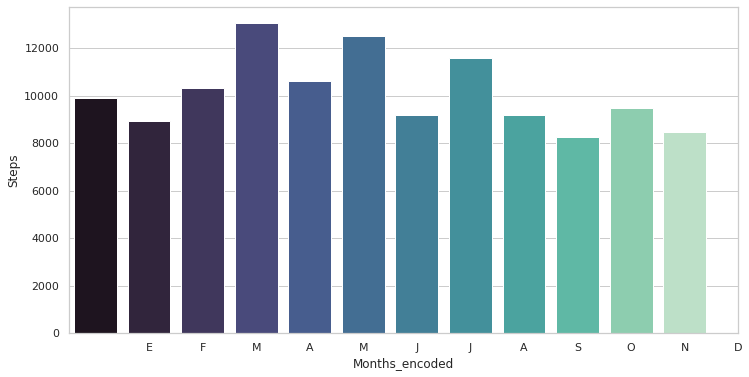

In [63]:
media_S = sns.barplot(x="Months_encoded", y="Steps", data=fitbit2, palette="mako");
plt.xticks(indice,meses);

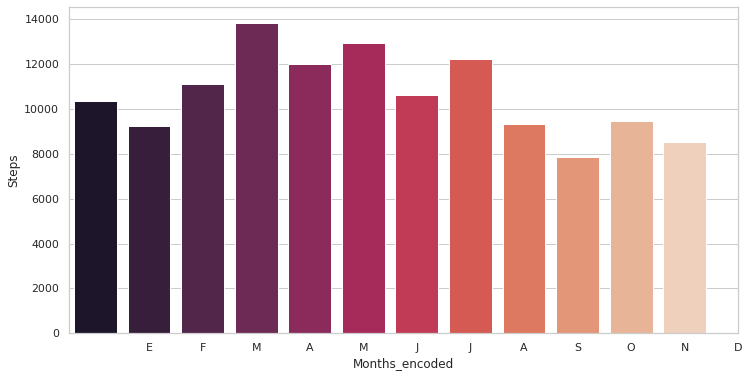

In [64]:
mediana_S = sns.barplot(x="Months_encoded", y="Steps", data=fitbit3, palette="rocket");
plt.xticks(indice,meses);

In [ ]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here

In [67]:
fitbit4=pd.DataFrame(fitbit["Steps"].groupby(fitbit["Work_or_Weekend"]).mean()).reset_index()
fitbit4

,Work_or_Weekend,Steps
0,0,10064.238095
1,1,10144.572519


In [ ]:
# assuming 1 stands for weekend, fitbiters are more active on weekends.

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [70]:
fitbit.head(1)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.4,92.086331,0.0,0.0,May,5


In [73]:
act=["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]

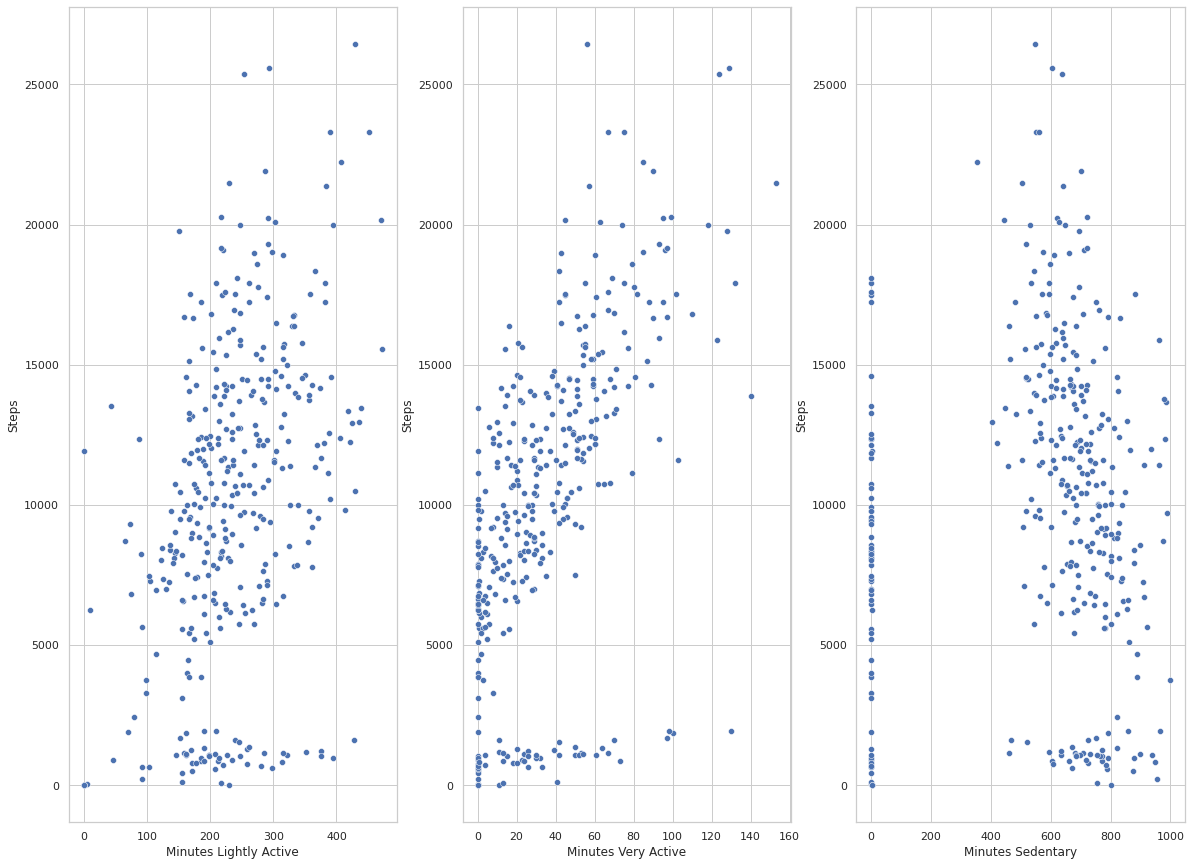

In [84]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))
for i in [0,1,2]:
    sns.scatterplot(x=act[i], y="Steps", data=fitbit, ax=axs[i])

In [80]:
mediana_S.figure.savefig("Figures/mediana_Steps.jpg")

In [83]:
fig.figure.savefig("Figures/los_3_juntos.jpg")

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [85]:
# your code here
titanic = pd.read_csv("../data/titanic.csv")

In [99]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S


In [100]:
titanic.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

#### Explore the titanic dataset using Pandas dtypes.

In [86]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [90]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include="number")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [91]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include="category")

""
0
1
2
3
4
...
1304
1305
1306
1307


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [96]:
sns.set(rc={"figure.figsize": (12.,6.)})       #   gracias Ras
sns.set_style("whitegrid")
# intento setearlo a classic , pero me dice que "ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks"

#### Use the right visulalization to show the distribution of column `Age`.

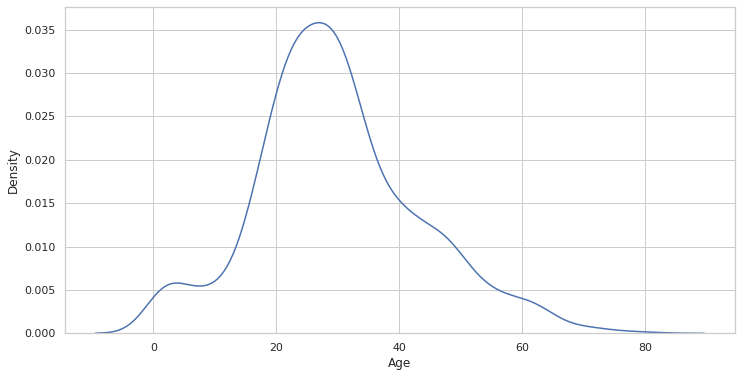

In [102]:
# your code here
sns.kdeplot(x=titanic.Age);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [103]:
bns=[10,20,50]

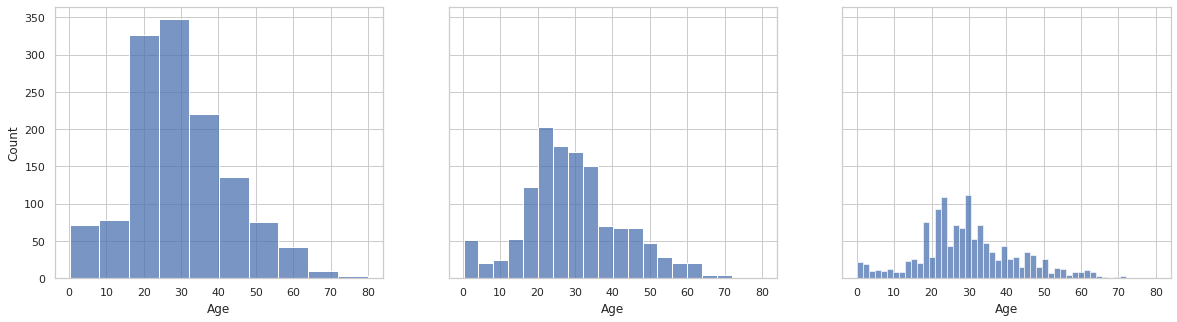

In [150]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=True)
for i in [0,1,2]:
    sns.histplot(x=titanic.Age, bins=bns[i], ax=axs[i])
    
# le meto el shareY para que todos los plots compartan la misma escala vertical :)

#### How does the bin size affect your plot?

In [ ]:
"""
the smallers the bins, the more accurate your data visualization is.
Also, as the bins are smaller, few individuals goes in each one, thus the account in each bin is lower. 
"""

#### Use seaborn to show the distribution of column `Age`.

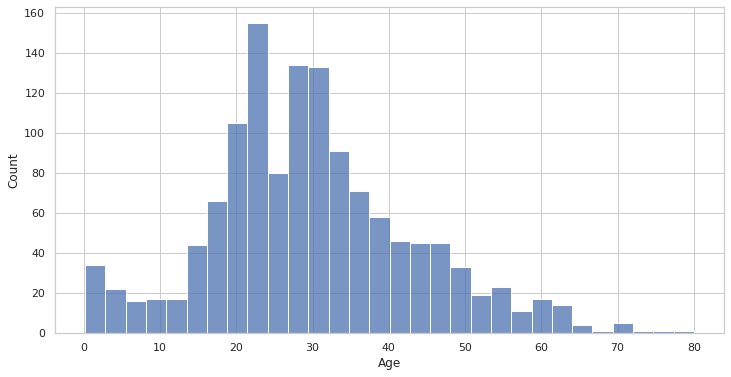

In [113]:
# your code here
sns.histplot(x=titanic.Age);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

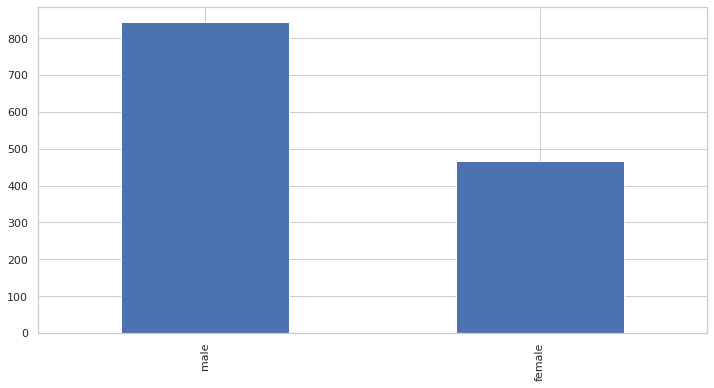

In [121]:
# Method 1 - matplotlib
# your code here
titanic["Gender"].value_counts().plot(kind="bar");

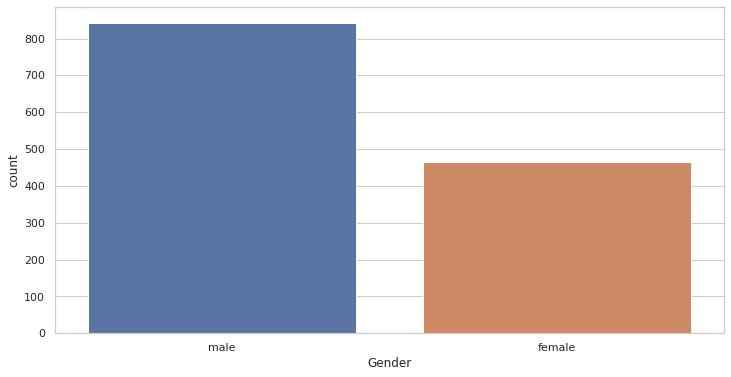

In [118]:
# Method 2 - seaborn
# your code here
sns.countplot(x=titanic.Gender);

#### Use the right plot to visualize the column `Pclass`.

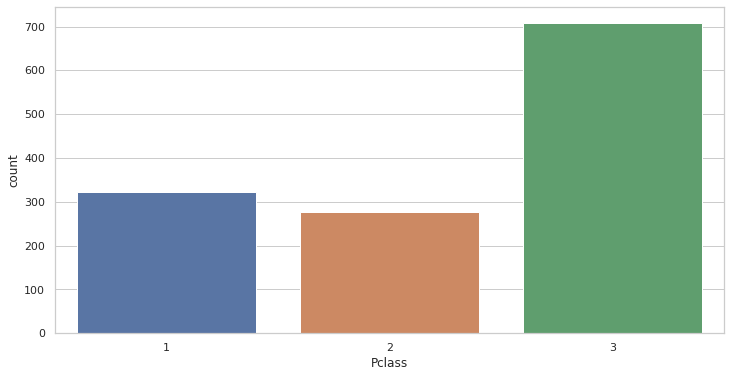

In [122]:
# your code here
sns.countplot(x=titanic.Pclass);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

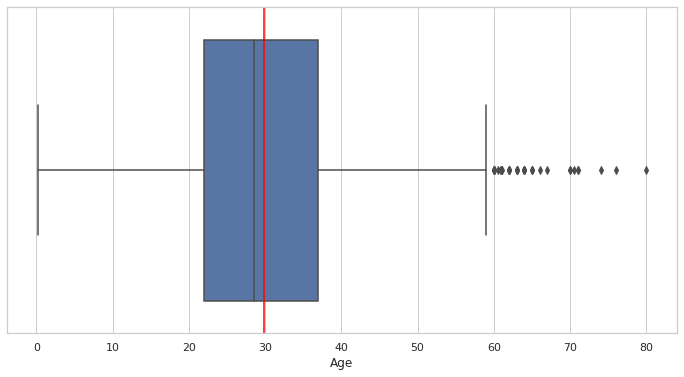

In [137]:
# your code here
summary = sns.boxplot(x="Age", data=titanic);
summary.axvline(x=titanic.Age.mean(), c="red", label="mean");

In [ ]:
"""
for "summary statistics" I understand mean, median, quartiles, etc..
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
half of the passengers were between ages 22 and 37
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

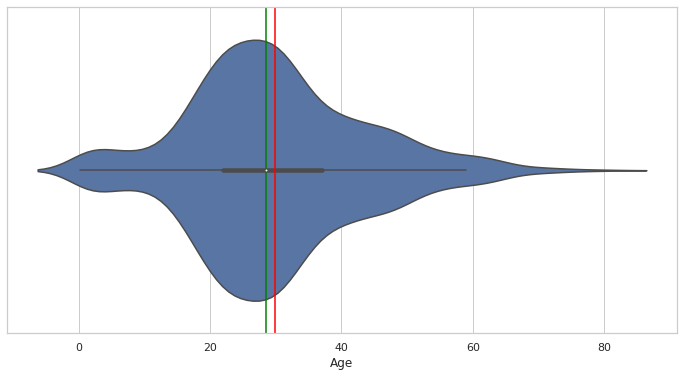

In [138]:
# your code here
summary2 = sns.violinplot(x="Age", data=titanic);
summary2.axvline(x=titanic.Age.mean(), c="red", label="mean");
summary2.axvline(x=titanic.Age.median(), c="green", label="median");

# he intentado meterle el kde al boxplot, pero no lo admite como argumento

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

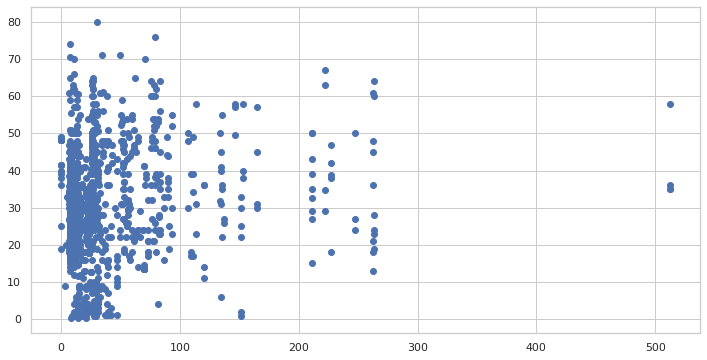

In [141]:
# Method 1 - matplotlib
# your code here
plt.scatter(x=titanic.Fare, y=titanic.Age);

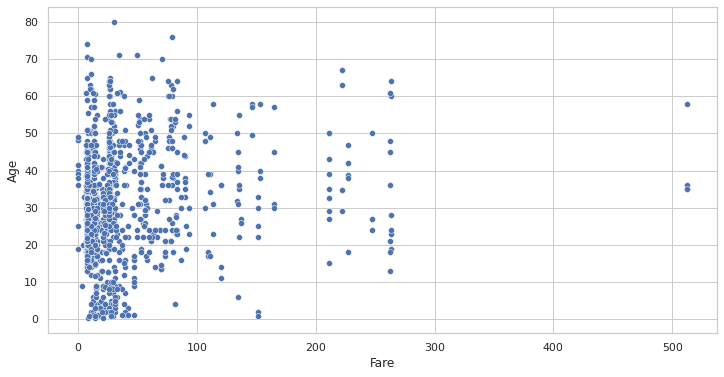

In [140]:
# Method 2 - seaborn
# your code here
sns.scatterplot(x="Fare", y="Age", data=titanic);

#### Plot the correlation matrix using seaborn.

In [143]:
# your code here
correl=titanic.corr()
correl

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### What are the most correlated features?

In [157]:
mascara = np.triu(np.ones_like(correl, dtype=bool))

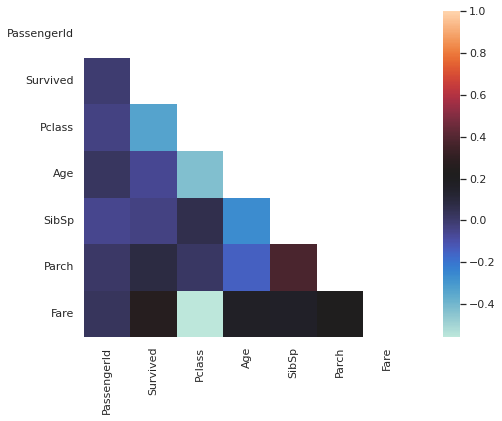

In [158]:
sns.heatmap(correl, mask=mascara, cmap="icefire", square=True, vmax=1);

In [ ]:
"""
"Fare" and "Passenger class" are strongly inversely-correlated, as low values of Pclass (1="First) correspond with highest fares.
Also are inversely related Age and Pclass, as most "low-age" crew was registered as 3rd class.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

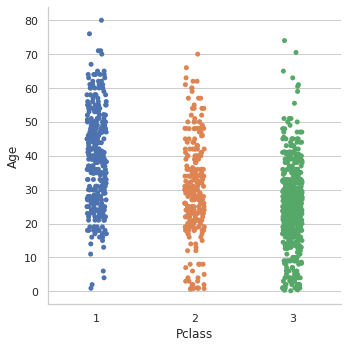

In [167]:
sns.catplot(x="Pclass", y="Age", data=titanic);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

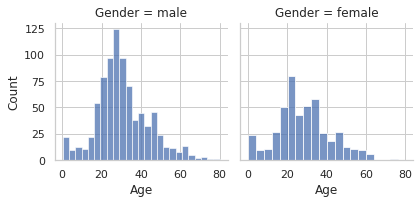

In [165]:
# your code here
gr = sns.FacetGrid(titanic, col="Gender");
gr.map(sns.histplot, "Age");